In [103]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

## Create a dataset that has distinct clusters for ease of k-means classification

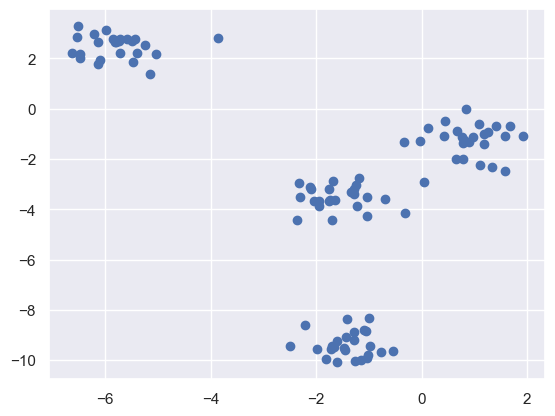

In [104]:
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples=100, centers=4, cluster_std=0.5, random_state=2)

plt.scatter(x[:, 0], x[:, 1])

## testing value (value that we don't know the classification of)

In [105]:
import random
test = np.array([random.randrange(-7, -2), random.randrange(-10, 3)])

## euclidean distance as a helper function

In [106]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

euclidean(test, np.array([-7, -7]))

7.280109889280518

## kmeans to "classify" the data

In [107]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

/Users/testtwo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


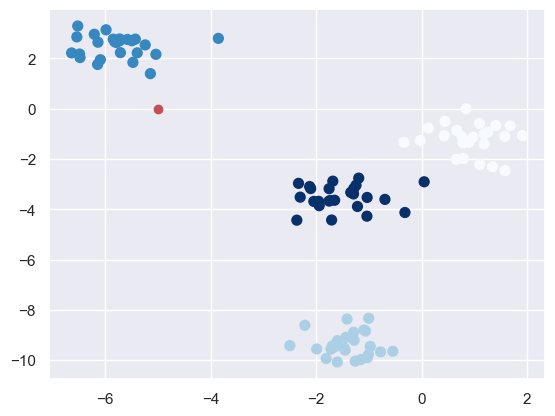

In [108]:
fig = plt.figure()
ax1 = fig.add_subplot()

ax1.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=50, cmap='Blues')
ax1.scatter(test[0], test[1], c='r', marker="o", label='test')
plt.show()

In [109]:
def find_neighbors(test, train, k):
    """
    test - new testing point, to be classified
    train - already classified training data
    k - k nearest neighbors
    """
    distances = []
    for i in range(len(train)):
        d = euclidean(train[i], test)
        distances.append((d, i))
        
    distances.sort(key=lambda tup: tup[0])
    return distances[:k]

neighbors = find_neighbors(test, x, 9)

In [110]:
import statistics as stat
def determine_vote(neighbors, y):
    n_classifer = []
    for i in range(len(neighbors)):
        n_classifer.append(y[neighbors[i][1]])
    return stat.mode(n_classifer)

print(determine_vote(neighbors, y))

3
